## Beer Analysis with Clustering

### 内容:

1. K-means clustering
2. Clustering evaluation
3. DBSCAN clustering

In [1]:
# 加载啤酒数据集（beer dataset）
import pandas as pd
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/beer.txt'
beer = pd.read_csv(url, sep=' ')
beer   #calories 卡路里；sodium 钠；alcohol 酒精；cost 成本

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


如何对这些啤酒进行聚类?

In [2]:
# 先定义属性数据 X
X = beer[["calories","sodium","alcohol","cost"]]

那么目标变量y? 数据中没有标签，是无监督的机器学习方法，要通过聚类算法得到。

### Part 1: K-means 聚类

In [3]:
# K-means with 3 clusters
from sklearn.cluster import KMeans

# 初始化3个类中心，然后用数据拟合，再2个类中心
km = KMeans(n_clusters=3).fit(X)
km2 = KMeans(n_clusters=2).fit(X)

In [4]:
# 查看聚类标签，即聚类结果：每个样本属于哪一类
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 2, 0, 0, 2, 1])

In [5]:
# 将聚类结果保存在数据框中，并按聚类结果排序
beer['cluster'] = km.labels_
beer['cluster2'] = km2.labels_
beer.sort_values(by='cluster')

,name,calories,sodium,alcohol,cost,cluster,cluster2
0,Budweiser,144,15,4.7,0.43,0,1
1,Schlitz,151,19,4.9,0.43,0,1
2,Lowenbrau,157,15,0.9,0.48,0,1
3,Kronenbourg,170,7,5.2,0.73,0,1
4,Heineken,152,11,5.0,0.77,0,1
5,Old_Milwaukee,145,23,4.6,0.28,0,1
6,Augsberger,175,24,5.5,0.40,0,1
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0,1
17,Heilemans_Old_Style,144,24,4.9,0.43,0,1
16,Hamms,139,19,4.4,0.43,0,1


看看聚类结果主要基于什么? Why?

In [6]:
# 查看一下类中心
from pandas.plotting import scatter_matrix
%matplotlib inline

#3个聚类结果的类中心
cluster_centers = km.cluster_centers_
print(cluster_centers)

#2个聚类结果的类中心
cluster_centers_2 = km2.cluster_centers_

[[150.          17.           4.52142857   0.52071429]
 [102.75        10.           4.075        0.44      ]
 [ 70.          10.5          2.6          0.42      ]]


In [13]:
# 计算每个cluster的每个特征的平均值
# 对于聚成3类的情况
beer.groupby("cluster").mean()

,calories,sodium,alcohol,cost,cluster2
cluster,,,,,
0,70.00,10.5,2.600000,0.420000,0
1,150.00,17.0,4.521429,0.520714,1
2,102.75,10.0,4.075000,0.440000,0


In [14]:
# 对于聚成2类的情况
beer.groupby("cluster2").mean()

,calories,sodium,alcohol,cost,cluster
cluster2,,,,,
0,91.833333,10.166667,3.583333,0.433333,1.333333
1,150.000000,17.000000,4.521429,0.520714,1.000000


In [15]:
# 保存类中心值（聚成3类的）
centers = beer.groupby("cluster").mean().reset_index()

In [17]:
# 设置绘图环境
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

In [18]:
# 创建需要的颜色数组
import numpy as np
colors = np.array(['red', 'green', 'blue', 'yellow'])

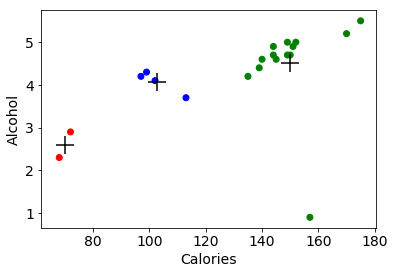

In [19]:
# 卡路里与酒精的散点图，区分cluster着色 (0=red, 1=green, 2=blue)
# 提示: 绘图中的颜色常通过 c=array 来赋值
# 希望你现在已经熟练掌握绘图!
plt.scatter(beer["calories"], beer["alcohol"],c=colors[beer["cluster"]])
# 聚类中心，标记成“+”( marked by "+")
# 理解 scatter函数用法
plt.scatter(centers.calories, centers.alcohol, linewidths=3, marker='+', s=300, c='black')

# 一定要记得加坐标轴标签！
plt.xlabel("Calories")
plt.ylabel("Alcohol")

散点图矩阵 （ scatterplot matrix ），如果数据有N维（N个属性），所有的属性两两组合就生成N x N个二维散点图。把这些图排列成N x N的矩阵。

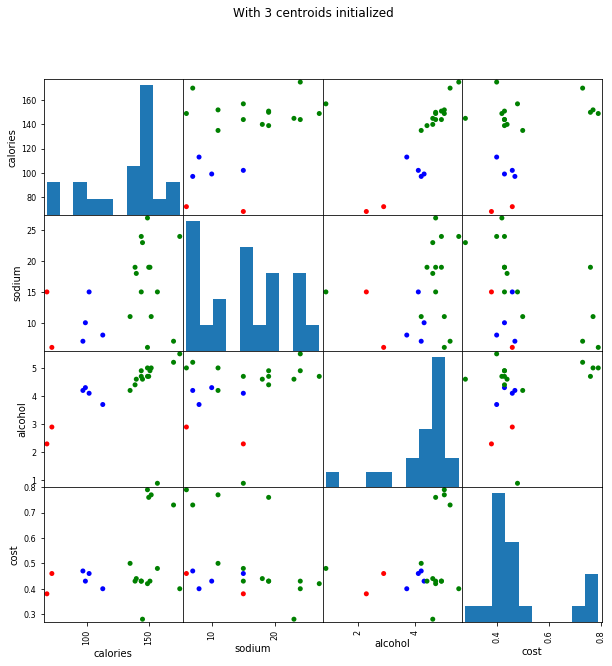

In [22]:
# 绘制散点图矩阵，聚成3类情况(0=red, 1=green, 2=blue)
# Scatterplot matrix with 3 centroids initialized
scatter_matrix(beer[["calories","sodium","alcohol","cost"]],s=100, alpha=1, c=colors[beer["cluster"]], figsize=(10,10))
plt.suptitle("With 3 centroids initialized")

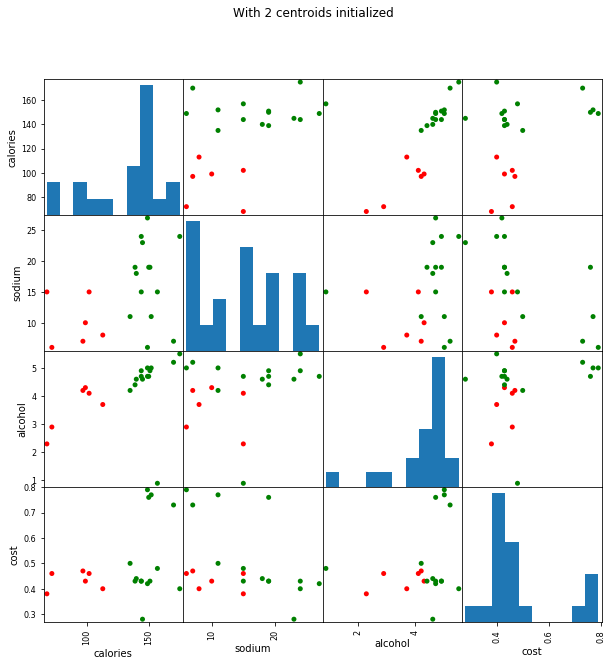

In [23]:
# 绘制散点图矩阵，2类情况
scatter_matrix(beer[["calories","sodium","alcohol","cost"]],s=100, alpha=1, c=colors[beer["cluster2"]], figsize=(10,10))
plt.suptitle("With 2 centroids initialized")

### 用标准化后的数据再做一边

In [24]:
# center and scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.38791334,  0.00779468,  0.43380786, -0.45682969],
       [ 0.6250656 ,  0.63136906,  0.62241997, -0.45682969],
       [ 0.82833896,  0.00779468, -3.14982226, -0.10269815],
       [ 1.26876459, -1.23935408,  0.90533814,  1.66795955],
       [ 0.65894449, -0.6157797 ,  0.71672602,  1.95126478],
       [ 0.42179223,  1.25494344,  0.3395018 , -1.5192243 ],
       [ 1.43815906,  1.41083704,  1.1882563 , -0.66930861],
       [ 0.55730781,  1.87851782,  0.43380786, -0.52765599],
       [-1.1366369 , -0.7716733 ,  0.05658363, -0.45682969],
       [-0.66233238, -1.08346049, -0.5092527 , -0.66930861],
       [ 0.25239776,  0.47547547,  0.3395018 , -0.38600338],
       [-1.03500022,  0.00779468, -0.13202848, -0.24435076],
       [ 0.08300329, -0.6157797 , -0.03772242,  0.03895447],
       [ 0.59118671,  0.63136906,  0.43380786,  1.88043848],
       [ 0.55730781, -1.39524768,  0.71672602,  2.0929174 ],
       [-2.18688263,  0.00779468, -1.82953748, -0.81096123],
       [ 0.21851887,  0.

In [17]:
# 用scaled data聚成3类
km = KMeans(n_clusters=3).fit(X_scaled)

In [25]:
# 保存聚类结果
beer["scaled_cluster"] = km.labels_
beer.sort_values("scaled_cluster")

,name,calories,sodium,alcohol,cost,cluster,cluster2,scaled_cluster
18,Olympia_Goled_Light,72,6,2.9,0.46,0,0,0
15,Pabst_Extra_Light,68,15,2.3,0.38,0,0,0
0,Budweiser,144,15,4.7,0.43,1,1,1
1,Schlitz,151,19,4.9,0.43,1,1,1
2,Lowenbrau,157,15,0.9,0.48,1,1,1
3,Kronenbourg,170,7,5.2,0.73,1,1,1
4,Heineken,152,11,5.0,0.77,1,1,1
5,Old_Milwaukee,145,23,4.6,0.28,1,1,1
6,Augsberger,175,24,5.5,0.40,1,1,1
7,Srohs_Bohemian_Style,149,27,4.7,0.42,1,1,1


每个类的特征是什么?

In [26]:
# 再来看看聚好的类的中心
beer.groupby("scaled_cluster").mean()

,calories,sodium,alcohol,cost,cluster,cluster2
scaled_cluster,,,,,,
0,70.00,10.5,2.600000,0.420000,0,0
1,150.00,17.0,4.521429,0.520714,1,1
2,102.75,10.0,4.075000,0.440000,2,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025F7BB90CC0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000025F7D2339E8>]], dtype=object)

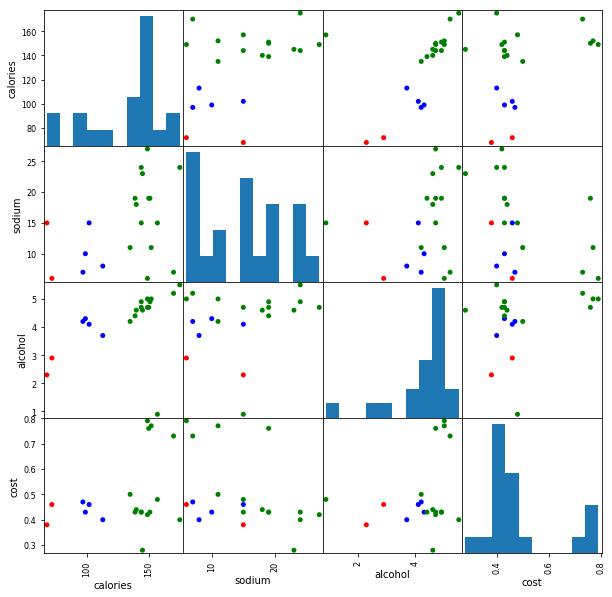

In [29]:
# 在用新的聚类赋值绘制散点图矩阵 (0=red, 1=green, 2=blue)
pd.plotting.scatter_matrix(X, c=colors[beer.scaled_cluster], alpha=1, figsize=(10,10), s=100)

如何知道上面聚类效果好不好？怎么来解释？

### Part 2: 聚类评估

 [轮廓系数](http://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient) 是在“真实”cluster分配未知的情况下评估聚类“性能”的常用指标。

轮廓系数是对 **每一个观察数据**按以下公式计算的值:

$$SC = \frac{b-a} {max(a, b)}$$

- a = 对于第 i 个对象，计算它到所属簇中所有其他对象的平均距离（体现凝聚度）
- b = 对于第 i 个对象，计算该对象到最近簇中所有对象的平均距离（体现分离度）

轮廓系数取值为[-1, 1]，其值越大越好，且当值为负时，表明 ai<bi，样本被分配到错误的簇中，聚类结果不可接受。对于接近0的结果，则表明聚类结果有重叠的情况。

其全局值是计算所有观测对象的平均值。

In [21]:
# 计算轮廓系数
from sklearn import metrics
score_scaled = metrics.silhouette_score(X,beer.scaled_cluster)
score = metrics.silhouette_score(X,beer.cluster)
print(score_scaled, score)

0.179780680894 0.673177504646


In [31]:
from sklearn import metrics
# 按 K=2 到 K=19 来计算轮廓系数
scores = []
for k in range(2,20):
    labels = KMeans(n_clusters=k).fit(X).labels_
    score = metrics.silhouette_score(X, labels)
    scores.append(score)

scores

[0.69176560340794857,
 0.67317750464557957,
 0.58570407211277953,
 0.42254873351720201,
 0.39888288049162546,
 0.43776116697963124,
 0.38946337473125997,
 0.39746405172426014,
 0.3915697409245163,
 0.32472080133848924,
 0.34597752371272478,
 0.31221439248428434,
 0.30707782144770296,
 0.31834561839139497,
 0.28495140011748982,
 0.23498077333071996,
 0.15880910174962809,
 0.084230513801511767]

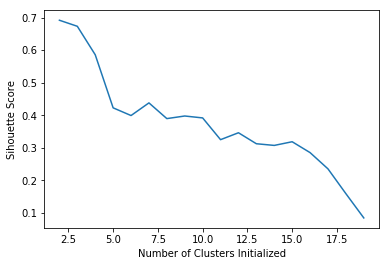

In [32]:
# 绘制上面计算结果的图形
plt.plot(list(range(2,20)), scores)
plt.xlabel("Number of Clusters Initialized")
plt.ylabel("Sihouette Score")

### Part 3: DBSCAN 聚类

In [33]:
# 设置 DBSCAN 参数：eps=1 and min_samples=3

from sklearn.cluster import DBSCAN
db = DBSCAN(eps=10, min_samples=2).fit(X)

In [35]:
# 查看聚类结果标签
labels = db.labels_
print(labels)

[ 0  0  0 -1  0  0 -1  0  1 -1  0  1  0  0  0  2  0  0  2  1]


In [36]:
# 保存聚类结果
beer['cluster_db'] = labels
beer.sort_values('cluster_db')

,name,calories,sodium,alcohol,cost,cluster,cluster2,scaled_cluster,cluster_db
9,Budweiser_Light,113,8,3.7,0.40,2,0,2,-1
3,Kronenbourg,170,7,5.2,0.73,1,1,1,-1
6,Augsberger,175,24,5.5,0.40,1,1,1,-1
17,Heilemans_Old_Style,144,24,4.9,0.43,1,1,1,0
16,Hamms,139,19,4.4,0.43,1,1,1,0
14,Kirin,149,6,5.0,0.79,1,1,1,0
13,Becks,150,19,4.7,0.76,1,1,1,0
12,Michelob_Light,135,11,4.2,0.50,1,1,1,0
10,Coors,140,18,4.6,0.44,1,1,1,0
0,Budweiser,144,15,4.7,0.43,1,1,1,0


In [37]:
# 查看聚类中心
beer.groupby('cluster_db').mean()

,calories,sodium,alcohol,cost,cluster,cluster2,scaled_cluster
cluster_db,,,,,,,
-1,152.666667,13.000000,4.800000,0.510000,1.333333,0.666667,1.333333
0,146.250000,17.250000,4.383333,0.513333,1.000000,1.000000,1.000000
1,99.333333,10.666667,4.200000,0.453333,2.000000,0.000000,2.000000
2,70.000000,10.500000,2.600000,0.420000,0.000000,0.000000,0.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025F7DB799E8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000025F7E11D080>]], dtype=object)

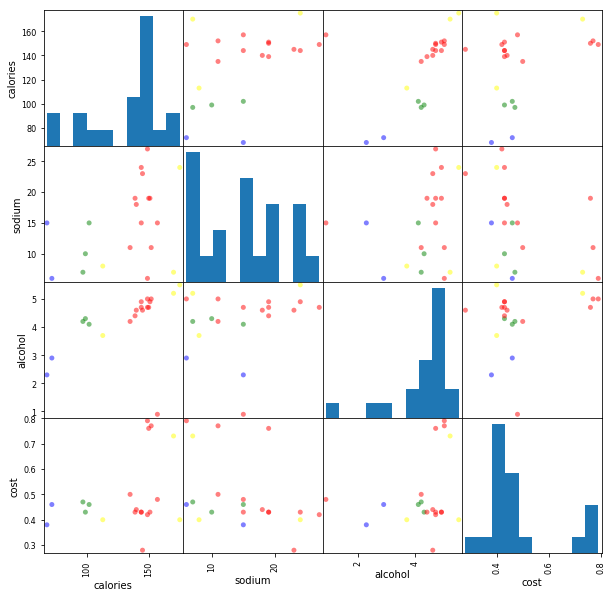

In [39]:
# 绘制 DBSCAN 的散点图矩阵 (0=red, 1=green, 2=blue, -1=yellow)
pd.plotting.scatter_matrix(X, c=colors[beer.cluster_db], figsize=(10,10), s=100)